In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("breast-cancer-wisconsin.data",header=None)
df.columns = ['SampleCodeNumber','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']

In [177]:
len(df)

699

In [178]:
df.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [179]:
df_modified = df
for col in df_modified.columns:
    df_modified[col].replace({'?':'1'}, inplace=True)
len(df_modified)

699

In [180]:
df_modified['Class'].replace([2, 4], ['benign', 'malignant'], inplace=True)

In [181]:
train, test = train_test_split(df_modified, test_size=0.35) 
print("Train size: ", train.shape, "\nTest size: ", test.shape)

Train size:  (454, 11) 
Test size:  (245, 11)


In [182]:
from chefboost import Chefboost as chef

config = {'algorithm': 'C4.5'}
model = chef.fit(train, config = config, target_label = 'Class')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  4.033124208450317  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  98.23788546255507 % on  454  instances
Labels:  ['malignant' 'benign']
Confusion matrix:  [[148, 6], [2, 298]]
Precision:  96.1039 %, Recall:  98.6667 %, F1:  97.3684 %


In [183]:
y_test = test['Class'].tolist()
test.drop(['Class'],axis=1,inplace=True)

y_pred = []
for index, row in test.iterrows():
    y_pred.append(chef.predict(model, row))

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C4.5 Accuracy:  0.9591836734693877


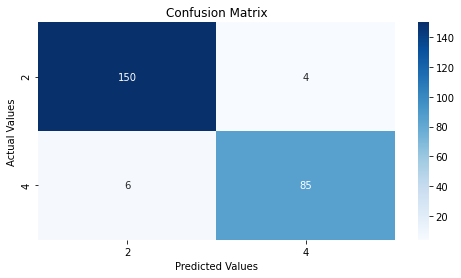

In [184]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("C4.5 Accuracy: ", metrics.accuracy_score(y_test, y_pred))